In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found. This will view all the tables in the SQL Lite
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table. This will add both the tables to classes

Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
sessions = Session(engine)

In [9]:
## Added this step to Explore tables - See columns in Measurement table using inspect
# Define inspector
inspector = inspect(engine)

# Get Column Names
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

# Look at the first 10 records in measurement table/class
engine.execute('Select * from measurement limit(10)').fetchall()


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [33]:
## Added this step Explore tables - See columns in Station table using inspect
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

# Look at the first 10 records in station table/class
engine.execute('Select * from station').fetchall()


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Precipitation Analysis

In [36]:
# Find the most recent date in the data set.
first_date = sessions.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
first_date


('2017-08-23')

<ipython-input-12-d1c8de818353>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prec.sort_values(by=['date'], inplace=True)


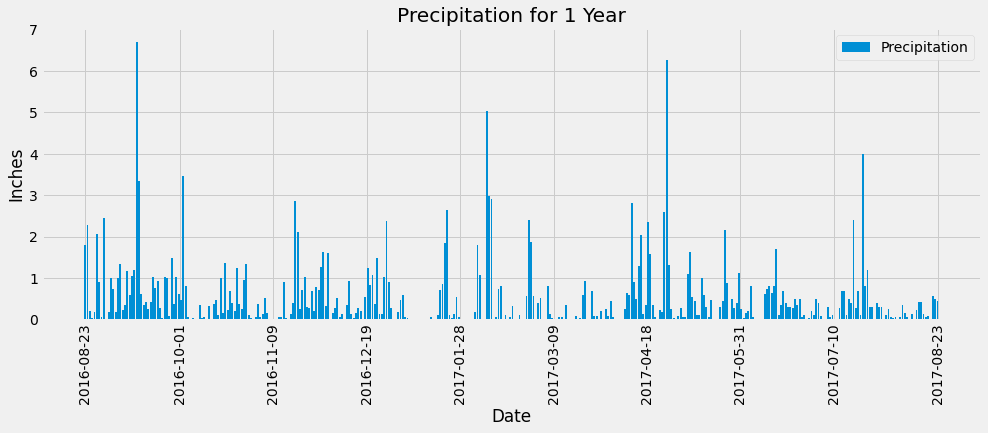

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
sessions.query(Measurement.id, Measurement.date, Measurement.prcp, Measurement.tobs).\
    order_by(Measurement.date.desc()).first()
    
# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

# # Perform a query to retrieve the data and precipitation scores
results = sessions.query(Measurement.id, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date >= query_date).order_by(Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
all_records = pd.DataFrame(results)

prec = all_records[['date', 'prcp']]


# Sort the dataframe by date
prec.sort_values(by=['date'], inplace=True)
pres_final = prec
pres_final
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(15,5))
plt.bar(pres_final['date'], pres_final['prcp'], label='Precipitation')
plt.xticks([0, 40.56, 80.56, 120.56, 160.56, 200.55, 240.55, 280.55, 320.55, 365], ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18','2017-05-31', '2017-07-10', '2017-08-23'], rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='upper right')
plt.title('Precipitation for 1 Year')
plt.show()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pres_final.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
sessions.query(func.count(Station.station)).all()

[(9)]

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order. Join the table group by station and count the records for each station
active = [Station.station, Station.name, func.count(Measurement.station).label('most_active')]

prcp_count = sessions.query(*active).\
    filter(Station.station == Measurement.station).\
        group_by(Station.station).\
            order_by(func.count(Measurement.station).desc()).all()

prcp_count

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature
calc_stats = sessions.query(func.min(Measurement.tobs).label('minimum_temperature'), func.max(Measurement.tobs).label('maximum_temperature'), func.avg(Measurement.tobs).label('average_temperature')).\
    filter(Measurement.station == prcp_count[0][0]).all()

print(f'The Minimum temperature of most active station: {calc_stats[0][0]}')
print(f'The Maximum temperature of most active station: {calc_stats[0][1]}')
print(f'The Minimum temperature of most active station: {calc_stats[0][2]}')


The Minimum temperature of most active station: 54.0
The Maximum temperature of most active station: 85.0
The Minimum temperature of most active station: 71.66378066378067


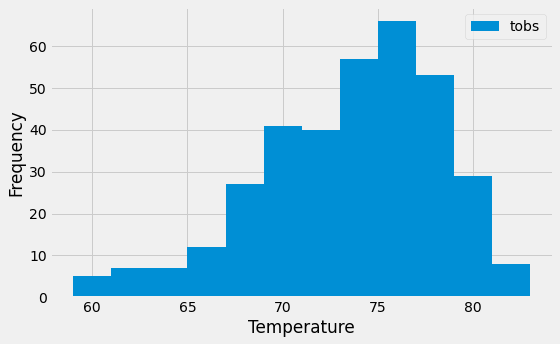

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_1Yr = sessions.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == prcp_count[0][0]).\
        filter(Measurement.date >= query_date).\
            order_by(Measurement.tobs.desc()).all()

temp_1Yr

temp_most_active = pd.DataFrame(temp_1Yr)

temp_most_active.plot(kind='hist', figsize=(8,5), bins=12)
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()


# Close session

In [ ]:
# Close Session
session.close()